In [1505]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import sklearn
import statistics
import scipy.stats
import matplotlib
matplotlib.rcParams.update({
    'font.size':20,
    'font.family':'DejaVu Sans', 
    'xtick.labelsize':20, 
    'ytick.labelsize':20, 
    'axes.labelsize':30, 
    'figure.figsize':(12, 8)
    })
import sklearn, sklearn.preprocessing, sklearn.decomposition
import matplotlib.patches as mpatches
from sklearn.ensemble import IsolationForest


In [1509]:
data_year = "2020"
cell_name = "CAL29"

data_dir = os.path.join("/Users/lidiayung/project/resource/perturbations/00_outputs_2020_CAL29")

#out_dir = "00_plots_" + data_year + "_" + cell_name + "_" 
#os.makedirs(out_dir, exist_ok = True)

In [1507]:
#Sig info

In [1513]:
sig_info_cell_df = pd.read_excel(os.path.join(data_dir,"sig_info_2020_CAL29.xlsx"), index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_CAL29_24H:A03,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A04,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A05,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A06,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:J13,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_CAL29_24H:P21,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_CAL29_24H:P22,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


In [1192]:
#Read DPDs

In [1515]:
DPD_inf_df = pd.read_excel(os.path.join(data_dir,"DPD_2020_CAL29.xlsx"),index_col=0)

In [1516]:
DPD_inf_df

,blca_inv,blca_onc,surv_coef,pert_drug,targets,dose
ASG002_CAL29_24H:A03,0.663709,-0.222062,-19.686949,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A04,-0.239146,-0.299726,-0.559724,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A05,0.047618,-0.390157,-9.728686,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A06,0.201597,-0.896831,2.231536,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:J13,-0.106294,-0.356076,-1.099635,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,-0.816218,1.371369,14.527131,BAY-61-3606,NaN,3.33 uM
MOAR012_CAL29_24H:P21,0.368909,0.102517,7.212078,BAY-61-3606,NaN,1.11 uM
MOAR012_CAL29_24H:P22,0.282584,0.456855,17.450052,ethaverine,NaN,10 uM
MOAR012_CAL29_24H:P23,-0.091262,-0.033682,7.936433,ethaverine,NaN,3.33 uM


In [1521]:
target_name = "ESR"

target = "ESR"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

#target = "ESR"
#drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [1523]:
drugs_list = drugs #+ ["OTS-167", "PHA-767491"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


In [ ]:
selected = 

target = "DMSO"

drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

dmso_df=DPD_inf_df.loc[sig_info_cell_df.targets.str.contains(target)]
dmso_df

In [1518]:
target = "MTOR"

drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))


print("drugs for target " + target + ":" , len(drugs), drugs)
mtor=DPD_inf_df.loc[sig_info_cell_df.targets.str.contains(target)]



drugs for target MTOR: 5 ['AZD-8055', 'KU-0063794', 'LY-294002', 'NVP-BEZ235', 'PI-103']


,blca_inv,blca_onc,surv_coef,pert_drug,targets,dose
ASG002_CAL29_24H:B03,-0.359877,0.247106,0.156869,AZD-8055,MTOR,0.12 uM
ASG002_CAL29_24H:C16,0.267211,-0.076384,-16.898693,NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG",10 uM
ASG002_CAL29_24H:C17,0.449547,0.682803,5.954722,NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG",1.11 uM
ASG002_CAL29_24H:C18,-0.040102,0.216836,-12.090675,NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG",0.12 uM
ASG002_CAL29_24H:F01,-0.150340,0.088656,-7.575713,LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC",10 uM
ASG002_CAL29_24H:F02,0.191824,-0.219885,-16.653942,LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC",1.11 uM
ASG002_CAL29_24H:F03,-0.710309,-0.243057,6.287228,LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC",0.12 uM
ASG002_CAL29_24H:L07,-1.197081,-2.203356,-5.277500,KU-0063794,MTOR,10 uM
ASG002_CAL29_24H:L08,-0.302974,0.518441,-15.637963,KU-0063794,MTOR,1.11 uM
ASG002_CAL29_24H:L09,-0.139151,0.236279,-6.526701,KU-0063794,MTOR,0.12 uM


In [1525]:
to_pca=DPD_inf_df.loc[sig_info_cell_df.pert_drug.str.contains(drugs)]


TypeError: unhashable type: 'list'

In [1497]:
to_pca_dpds =to_pca[['blca_inv','blca_onc','surv_coef']]

In [1498]:

scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(to_pca_dpds.values)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.56523116 0.33341   ]


In [1499]:
result_pca = pd.DataFrame(new,index=to_pca_dpds.index,columns=['PCA1','PCA2'])
result_pca['pert_drug']=to_pca['pert_drug']
result_pca['dose']=to_pca['dose']
result_pca

,PCA1,PCA2,pert_drug,dose
ASG002_CAL29_24H:A10,1.571024,1.263658,taselisib,10 uM
ASG002_CAL29_24H:A11,-0.868402,0.329608,taselisib,1.11 uM
ASG002_CAL29_24H:A12,-0.801647,-0.806078,taselisib,0.12 uM
ASG002_CAL29_24H:A19,-1.726982,0.813510,AS-605240,10 uM
ASG002_CAL29_24H:A20,-2.200505,-0.013792,AS-605240,1.11 uM
ASG002_CAL29_24H:A21,0.438739,0.553652,AS-605240,0.12 uM
ASG002_CAL29_24H:C16,-0.874033,1.584117,NVP-BEZ235,10 uM
ASG002_CAL29_24H:C17,-1.302301,-1.423417,NVP-BEZ235,1.11 uM
ASG002_CAL29_24H:C18,-0.599014,0.889964,NVP-BEZ235,0.12 uM
ASG002_CAL29_24H:F01,-0.191250,0.422933,LY-294002,10 uM


In [1500]:

# Generate a list of unique drugs
unique_drugs = list(set(result_pca['pert_drug']))
# Define color names
color_names = ['red', 'green', 'purple', 'orange', 'blue','brown',  'cyan', 'magenta', 'yellow', 'black', 'gray', 'olive', 'pink', 'lime', 'gold', 'navy', 'maroon', 'teal', 'coral', 'aqua']
colors = plt.cm.tab20.colors  # You can use other colormap as well
num_colors = len(colors)

In [1501]:

# Create a dictionary to map each unique drug to a color
drug_color_map = {drug: color_names[i % len(color_names)] for i, drug in enumerate(unique_drugs)}

# Assign colors to the_colors list based on the drug_color_map
the_colors = [drug_color_map[drug] for drug in result_pca['pert_drug']]

# Define marker sizes based on dose
dose_size_map = {
    '0 uM': 100,
    '0.08 uM': 150,
    '0.12 uM': 250,
    '1.11 uM': 500,
    '3.33 uM': 750,
    '10 uM': 900  # default size for doses not specified
}

# Assign sizes to the marker_sizes list based on the dose_size_map
marker_sizes = [dose_size_map.get(dose, dose_size_map) for dose in result_pca['dose']]

# Define marker shapes
marker_shapes = ['*','s', 'o', 'p', 'd', 'x', ]#, 's', '<', '>', 'v', 'H', '8']
drug_shape_map = {drug: marker_shapes[i % len(marker_shapes)] for i, drug in enumerate(unique_drugs)}

# Assign shapes to the marker_shapes list based on the drug_shape_map
the_shapes = [drug_shape_map[drug] for drug in result_pca['pert_drug']]

# Print the assigned results for verification
for element, color, size, shape in zip(result_pca['pert_drug'], the_colors, marker_sizes, the_shapes):
    print(f"Drug: {element}, Assigned Color: {color}, Size: {size}, Shape: {shape}")

Drug: taselisib, Assigned Color: brown, Size: 900, Shape: x
Drug: taselisib, Assigned Color: brown, Size: 500, Shape: x
Drug: taselisib, Assigned Color: brown, Size: 250, Shape: x
Drug: AS-605240, Assigned Color: purple, Size: 900, Shape: o
Drug: AS-605240, Assigned Color: purple, Size: 500, Shape: o
Drug: AS-605240, Assigned Color: purple, Size: 250, Shape: o
Drug: NVP-BEZ235, Assigned Color: cyan, Size: 900, Shape: *
Drug: NVP-BEZ235, Assigned Color: cyan, Size: 500, Shape: *
Drug: NVP-BEZ235, Assigned Color: cyan, Size: 250, Shape: *
Drug: LY-294002, Assigned Color: red, Size: 900, Shape: *
Drug: LY-294002, Assigned Color: red, Size: 500, Shape: *
Drug: LY-294002, Assigned Color: red, Size: 250, Shape: *
Drug: PI-103, Assigned Color: orange, Size: 900, Shape: p
Drug: PI-103, Assigned Color: orange, Size: 500, Shape: p
Drug: PI-103, Assigned Color: orange, Size: 250, Shape: p
Drug: GDC-0349, Assigned Color: green, Size: 900, Shape: s
Drug: GDC-0349, Assigned Color: green, Size: 750, 

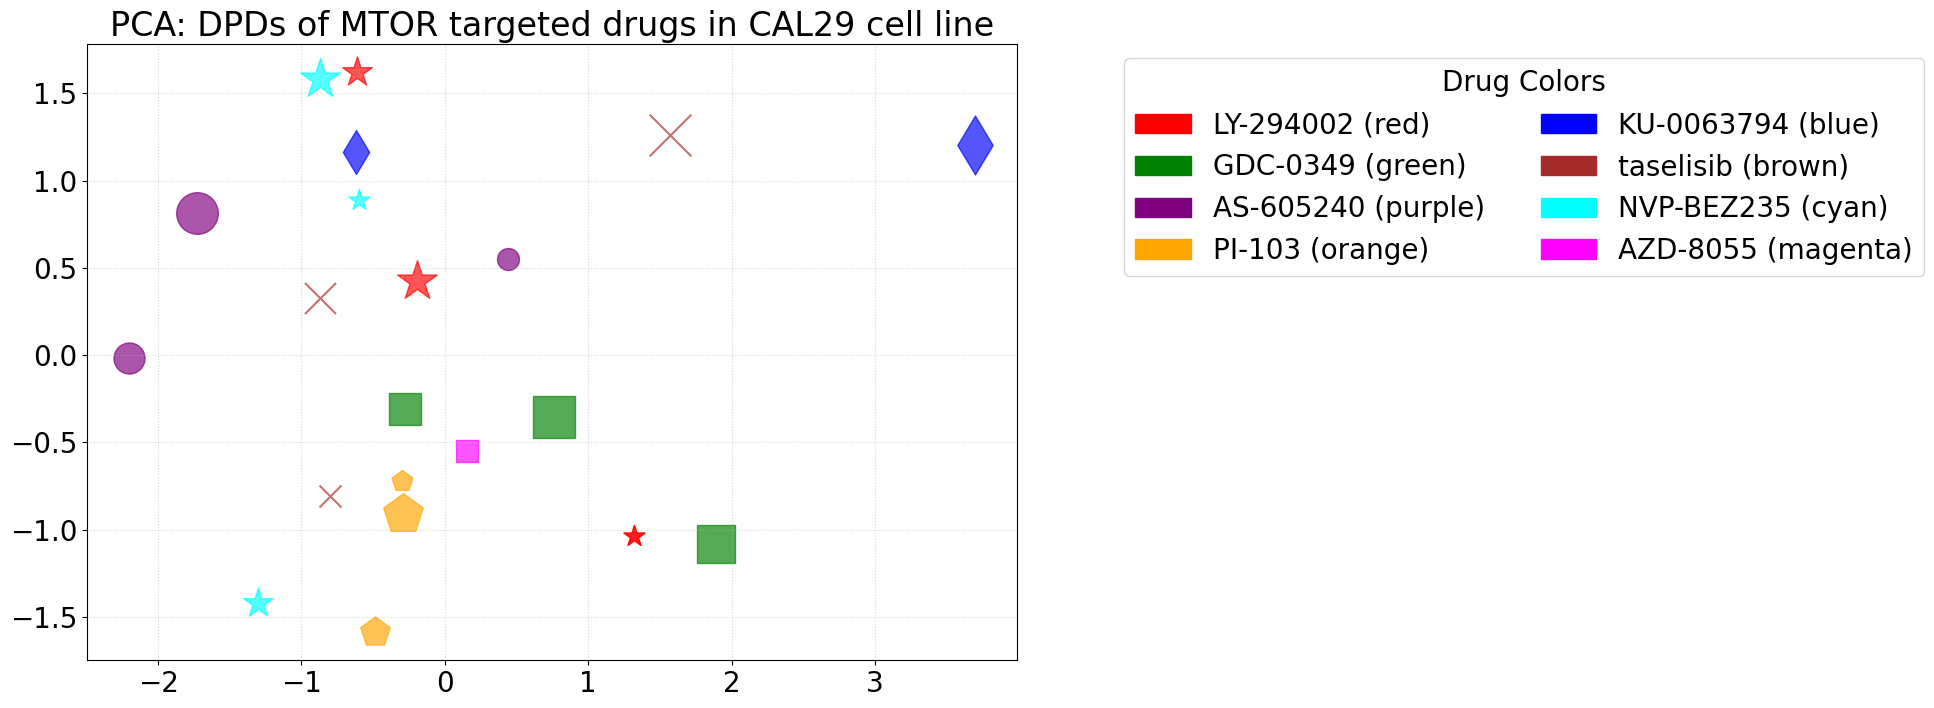

In [1502]:
for i in range(len(result_pca)):
    plt.scatter(result_pca.iloc[i]['PCA1'], result_pca.iloc[i]['PCA2'], s=marker_sizes[i], c=the_colors[i], marker=the_shapes[i], alpha=2/3)
# Create legend
legend_elements = [mpatches.Patch(color=drug_color_map[drug], label=f"{drug} ({drug_color_map[drug]})") for drug in unique_drugs]
plt.legend(handles=legend_elements, title="Drug Colors",ncol=2, bbox_to_anchor=(1.1,1))#

plt.grid(alpha=0.5, ls=':')
plt.title(f'PCA: DPDs of {target} targeted drugs in {cell_name} cell line')
plt.show()


In [1503]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=41)

model.fit(to_pca_dpds)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 41, 'verbose': 0, 'warm_start': False}


In [1504]:
result_pca['scores'] = model.decision_function(to_pca_dpds)

result_pca['anomaly_score'] = model.predict(to_pca_dpds)

result_pca[result_pca['anomaly_score']==-1].head()

,PCA1,PCA2,pert_drug,dose,scores,anomaly_score
ASG002_CAL29_24H:A20,-2.200505,-0.013792,AS-605240,1.11 uM,-0.001166,-1
MOAR010_CAL29_24H:D02,1.889618,-1.084543,GDC-0349,3.33 uM,-0.019806,-1
ASG002_CAL29_24H:L07,3.697217,1.203179,KU-0063794,10 uM,-0.133764,-1


In [1484]:
result_pca['targets']=to_pca['targets']
result_pca.sort_values(['scores'])

,PCA1,PCA2,pert_drug,dose,scores,anomaly_score,targets
MOAR011_CAL29_24H:C02,3.174332,0.165030,oxandrolone,3.33 uM,-0.076434,-1,AR
MOAR010_CAL29_24H:L20,-1.511987,1.430138,testosterone-propionate,3.33 uM,-0.008919,-1,AR
MOAR011_CAL29_24H:C01,0.600922,2.148042,oxandrolone,10 uM,0.013378,1,AR
MOAR008_CAL29_24H:L01,0.885500,-1.421779,flufenamic-acid,10 uM,0.024021,1,"AKR1C3, AR, PTGS1, PTGS2"
MOAR011_CAL29_24H:C10,0.936381,1.315138,testosterone-enanthate,10 uM,0.062692,1,AR
MOAR011_CAL29_24H:J10,-1.474709,0.389321,nandrolone,10 uM,0.063235,1,"AR, CYP19A1, MAOA, MAOB, NISCH"
MOAR008_CAL29_24H:L02,-0.282678,-1.203287,flufenamic-acid,3.33 uM,0.073678,1,"AKR1C3, AR, PTGS1, PTGS2"
MOAR011_CAL29_24H:J12,-0.546100,0.589173,nandrolone,1.11 uM,0.090422,1,"AR, CYP19A1, MAOA, MAOB, NISCH"
MOAR010_CAL29_24H:L21,-1.356546,-0.486876,testosterone-propionate,1.11 uM,0.104843,1,AR
MOAR010_CAL29_24H:L19,-1.116328,-0.279351,testosterone-propionate,10 uM,0.124977,1,AR


In [1485]:
result_pca.to_pickle(f"/Users/lidiayung/Downloads/cal29_isf/{cell_name}_{target}_exclusive_PCA_ISF.pkl")

In [1486]:
result_pca.shape

(15, 7)

In [1419]:
set(result_pca['pert_drug'])

{'masitinib', 'ponatinib', 'sorafenib'}